<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Multi-study-MAGs" data-toc-modified-id="Multi-study-MAGs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Multi-study MAGs</a></span><ul class="toc-item"><li><span><a href="#Collecting-all-MAGs" data-toc-modified-id="Collecting-all-MAGs-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Collecting all MAGs</a></span></li><li><span><a href="#checkM-info" data-toc-modified-id="checkM-info-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>checkM info</a></span></li><li><span><a href="#GTDB-tk-info" data-toc-modified-id="GTDB-tk-info-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>GTDB-tk info</a></span></li></ul></li><li><span><a href="#Georg-animal-gut-MAGs" data-toc-modified-id="Georg-animal-gut-MAGs-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Georg animal gut MAGs</a></span><ul class="toc-item"><li><span><a href="#Collecting-all-MAGs" data-toc-modified-id="Collecting-all-MAGs-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Collecting all MAGs</a></span></li><li><span><a href="#checkM-info" data-toc-modified-id="checkM-info-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>checkM info</a></span></li><li><span><a href="#GTDB-tk-info" data-toc-modified-id="GTDB-tk-info-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>GTDB-tk info</a></span></li></ul></li><li><span><a href="#Merging" data-toc-modified-id="Merging-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Merging</a></span><ul class="toc-item"><li><span><a href="#checking-overlap" data-toc-modified-id="checking-overlap-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>checking overlap</a></span></li><li><span><a href="#Joining" data-toc-modified-id="Joining-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Joining</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Just-quality-MAGs" data-toc-modified-id="Just-quality-MAGs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Just quality MAGs</a></span><ul class="toc-item"><li><span><a href="#Writing-table" data-toc-modified-id="Writing-table-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Writing table</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summarize all MAGs generated by all assemblies

# Var

In [1]:
# Multi-Study info
MS_work_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/',
                         'metagenome/multi-study/BioProjects/summary/LLMGA/')
MS_tmp_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/'

# Georg Animal gut wOutVertebrata per-host-class assemblies
GA_work_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome/',
                     'HiSeqRuns126-133-0138/wOutVertebrata/MG_assembly_summary/')
GA_tmp_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/'

# workdir
work_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/',
                      'metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal')
MAG_dir = file.path(work_dir, 'MAGs')

# params
threads = 24

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(LeyLabRMisc)

Warning message:
“package ‘LeyLabRMisc’ was built under R version 3.6.3”


In [5]:
df.dims()

# Load

## Multi-study MAGs

In [24]:
MS_projects = dir(MS_tmp_out_dir, 'PR*', full.names = TRUE) %>% sapply(basename) %>% as.vector
MS_projects %>% length %>% print
MS_projects

[1] 13


[1] "PRJEB11755"              "PRJEB20308"             
 [3] "PRJEB22765"              "PRJEB23642"             
 [5] "PRJEB29346"              "PRJEB9357"              
 [7] "PRJNA316560-PRJNA316570" "PRJNA336354"            
 [9] "PRJNA381379"             "PRJNA417359"            
[11] "PRJNA476660"             "PRJNA485217"            
[13] "PRJNA532626"

### Collecting all MAGs

* combining all MAGs in 1 directory; renaming as needed
* all MAGs generated

In [28]:
# MAGs selected by DAS-tool 
das_tool_genomes = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    das_tool_dir = file.path(asmbl_dir, 'bin_refine', 'DAS_Tool')
    
    dastool_files = list.files(das_tool_dir, '*.fa$', full.names=TRUE, recursive=TRUE)
    dastool = data.frame(binID = gsub('\\.fa$', '', basename(dastool_files)),
                    fasta = dastool_files)
    dastool$projectID = projectID
    return(dastool)
}

# loading all post das-tool files
MS_dastool = MS_projects %>% as.list %>% lapply(das_tool_genomes, tmp_out_dir=MS_tmp_out_dir) %>%
    do.call(rbind, .) %>%
    mutate(dataset = 'multi-study')
MS_dastool 

binID,fasta,projectID,dataset
<fct>,<fct>,<chr>,<chr>
SAMEA3663006__maxbin2_high_prob.014.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_high_prob.014.contigs.fa,PRJEB11755,multi-study
SAMEA3663006__maxbin2_low_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_low_prob.005.contigs.fa,PRJEB11755,multi-study
⋮,⋮,⋮,⋮
R28__metabat2_low_PE.037.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA532626/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/R28__metabat2_low_PE.037.contigs.fa,PRJNA532626,multi-study
R28__metabat2_low_PE.058.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA532626/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/R28__metabat2_low_PE.058.contigs.fa,PRJNA532626,multi-study


In [29]:
# checking for unique naming 
MS_dastool$binID %>% length %>% print
MS_dastool$binID %>% unique %>% length %>% print

[1] 8488
[1] 8488


### checkM info

In [30]:
checkm_info = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    checkm_markers_file = file.path(asmbl_dir, 'checkm', 'markers_qa_summary.tsv')
    
    markers_sum = read.delim(checkm_markers_file, sep='\t')

    markers_sum$projectID = projectID
    return(markers_sum)
}

# checkm info
MS_markers_sum = MS_projects %>% as.list %>% lapply(checkm_info, tmp_out_dir=MS_tmp_out_dir) %>%
    do.call(rbind, .) %>%
    inner_join(MS_dastool, c('Bin.Id'='binID', 'projectID'='projectID')) %>%
    mutate(dataset = 'multi-study')
MS_markers_sum 

Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..ambiguous.bases,⋯,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID,fasta,dataset
<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<fct>,<chr>
SAMEA3663136__maxbin2_low_prob.001.contigs,o__Bacteroidales (UID2716),92,487,270,69.20,1.2,36.36,2021688,0,⋯,2269,134,342,11,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.001.contigs.fa,multi-study
SAMEA3663136__maxbin2_low_prob.002.contigs,c__Clostridia (UID1118),387,223,124,36.76,0.0,0.00,559857,0,⋯,736,136,87,0,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.002.contigs.fa,multi-study
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
R28__metabat2_low_PE.037.contigs,o__Clostridiales (UID1212),172,263,149,50.70,0.67,0,845685,0,⋯,933,113,149,1,0,0,0,PRJNA532626,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA532626/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/R28__metabat2_low_PE.037.contigs.fa,multi-study
R28__metabat2_low_PE.058.contigs,o__Bacteroidales (UID2716),92,487,270,56.53,1.42,20,1444572,0,⋯,1554,205,277,5,0,0,0,PRJNA532626,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA532626/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/R28__metabat2_low_PE.058.contigs.fa,multi-study


### GTDB-tk info

In [31]:
gtdbtk_info = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    gtdbtk_bac_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_bac_summary.tsv')
    gtdbtk_arc_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_ar_summary.tsv')

    ## bacteria
    gtdb = read.delim(gtdbtk_bac_sum_file, sep='\t') %>%
        dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
        separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
    ## archaea
    if(file.size(gtdbtk_arc_sum_file) > 0){
        X = read.delim(gtdbtk_arc_sum_file, sep='\t', header=FALSE) 
        colnames(X) = gtdbtk_bac_sum_file %>% read.delim(sep='\t') %>% colnames
        X = X %>%
            dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
            separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
        gtdb = rbind(gtdb,X)
    }
    gtdb$projectID = projectID
    return(gtdb)
}

# gtdb info
MS_gtdbtk = MS_projects %>% as.list %>% lapply(gtdbtk_info, tmp_out_dir=MS_tmp_out_dir) %>%
    do.call(rbind, .) %>%
    mutate(dataset = 'multi-study')
MS_gtdbtk


Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 1 rows [1].”
Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 1 rows [1].”
Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.912633214467, 0.908236779677, :
“invalid factor level, NA generated”
Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.949860619467, 0.854655634167, :
“invalid factor level, NA generated”


user_genome,Domain,Phylum,Class,Order,Family,Genus,Species,fastani_reference,fastani_reference_radius,⋯,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings,projectID,dataset
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>
SAMEA3663177__metabat2_low_PE.009.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella sp000834015,GCF_000834015.1,95.0,⋯,0.98,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__,ANI/Placement,topological placement and ANI have congruent species assignments,89.25,11,N/A,N/A,PRJEB11755,multi-study
SAMEA3663136__metabat2_low_PE.004.contigs,d__Bacteria,p__Firmicutes_C,c__Negativicutes,o__Acidaminococcales,f__Acidaminococcaceae,g__Phascolarctobacterium_A,s__Phascolarctobacterium_A succinatutens,GCF_000188175.1,95.0,⋯,1.0,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A;s__,ANI/Placement,topological placement and ANI have congruent species assignments,63.73,11,N/A,N/A,PRJEB11755,multi-study
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
R27__metabat2_low_PE.024.contigs,d__Archaea,p__Euryarchaeota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A,s__Methanobrevibacter_A sp900314695,GCA_900314695.1,95.0,⋯,0.79,d__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter_A;s__,ANI/Placement,topological placement and ANI have congruent species assignments,97.19,11,N/A,N/A,PRJNA532626,multi-study
R28__maxbin2_low_prob.004.contigs,d__Archaea,p__Euryarchaeota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter_A,s__Methanobrevibacter_A sp900314695,GCA_900314695.1,95.0,⋯,0.83,d__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter_A;s__,ANI/Placement,topological placement and ANI have congruent species assignments,78.59,11,N/A,N/A,PRJNA532626,multi-study


## Georg animal gut MAGs

In [32]:
GA_projects = c(
'MG_assembly_act',
'MG_assembly_amp',
'MG_assembly_ave',
'MG_assembly_mam',
'MG_assembly_rep'
)

In [34]:
# loading all post das-tool files
GA_dastool = GA_projects %>% as.list %>% lapply(das_tool_genomes, tmp_out_dir=GA_tmp_out_dir) %>%
    do.call(rbind, .) %>%
    mutate(dataset = 'multi-study')
GA_dastool

binID,fasta,projectID,dataset
<fct>,<fct>,<chr>,<chr>
X125_Common_Carp__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X125_Common_Carp__maxbin2_low_prob.001.contigs.fa,MG_assembly_act,multi-study
X183_European_Chub__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X183_European_Chub__maxbin2_low_prob.001.contigs.fa,MG_assembly_act,multi-study
⋮,⋮,⋮,⋮
X95_Meadow_Viper__maxbin2_high_prob.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_rep/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X95_Meadow_Viper__maxbin2_high_prob.003.contigs.fa,MG_assembly_rep,multi-study
X95_Meadow_Viper__metabat2_low_PE.002.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_rep/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa,MG_assembly_rep,multi-study


### Collecting all MAGs

In [36]:
# loading all post das-tool files
GA_dastool = GA_projects %>% as.list %>% lapply(das_tool_genomes, tmp_out_dir=GA_tmp_out_dir) %>%
    do.call(rbind, .) %>%
    mutate(dataset = 'multi-species')
GA_dastool 

binID,fasta,projectID,dataset
<fct>,<fct>,<chr>,<chr>
X125_Common_Carp__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X125_Common_Carp__maxbin2_low_prob.001.contigs.fa,MG_assembly_act,multi-species
X183_European_Chub__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X183_European_Chub__maxbin2_low_prob.001.contigs.fa,MG_assembly_act,multi-species
⋮,⋮,⋮,⋮
X95_Meadow_Viper__maxbin2_high_prob.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_rep/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X95_Meadow_Viper__maxbin2_high_prob.003.contigs.fa,MG_assembly_rep,multi-species
X95_Meadow_Viper__metabat2_low_PE.002.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_rep/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa,MG_assembly_rep,multi-species


In [37]:
# checking for unique naming 
GA_dastool$binID %>% length %>% print
GA_dastool$binID %>% unique %>% length %>% print

[1] 442
[1] 442


### checkM info

In [38]:
# checkm info
GA_markers_sum = GA_projects %>% as.list %>% lapply(checkm_info, tmp_out_dir=GA_tmp_out_dir) %>%
    do.call(rbind, .) %>%
    inner_join(GA_dastool, c('Bin.Id'='binID', 'projectID'='projectID')) %>%
    mutate(dataset = 'multi-species')
GA_markers_sum 

Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..ambiguous.bases,⋯,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID,fasta,dataset
<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<fct>,<chr>
X329_Bleak__maxbin2_high_prob.001.contigs,c__Gammaproteobacteria (UID4754),541,304,171,72.51,8.96,74.07,3158255,0,⋯,3342,69,208,27,0,0,0,MG_assembly_act,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X329_Bleak__maxbin2_high_prob.001.contigs.fa,multi-species
X329_Bleak__maxbin2_high_prob.002.contigs,k__Bacteria (UID2329),174,149,89,77.23,6.23,88.89,1763352,0,⋯,1851,27,113,9,0,0,0,MG_assembly_act,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X329_Bleak__maxbin2_high_prob.002.contigs.fa,multi-species
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95_Meadow_Viper__maxbin2_high_prob.003.contigs,o__Bacteroidales (UID2657),160,492,269,39.63,6.68,10.34,3508066,0,⋯,4236,294,180,14,3,1,0,MG_assembly_rep,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_rep/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X95_Meadow_Viper__maxbin2_high_prob.003.contigs.fa,multi-species
X95_Meadow_Viper__metabat2_low_PE.002.contigs,f__Enterobacteriaceae (UID5124),134,1172,336,89.06,0.94,58.33,3738913,0,⋯,3861,107,1053,12,0,0,0,MG_assembly_rep,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_rep/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa,multi-species


### GTDB-tk info

In [39]:
GA_gtdbtk = GA_projects %>% as.list %>% lapply(gtdbtk_info, tmp_out_dir=GA_tmp_out_dir) %>%
    do.call(rbind, .) %>%
    mutate(dataset = 'multi-species')
GA_gtdbtk

Warning message in `[<-.factor`(`*tmp*`, ri, value = c(80.38, 98.28)):
“invalid factor level, NA generated”
Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.987172349716, 0.94327894093, :
“invalid factor level, NA generated”


user_genome,Domain,Phylum,Class,Order,Family,Genus,Species,fastani_reference,fastani_reference_radius,⋯,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings,projectID,dataset
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<chr>,<chr>
X329_Bleak__maxbin2_high_prob.001.contigs,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Aeromonadaceae,g__Aeromonas,s__Aeromonas veronii,GCF_000820225.1,95.0,⋯,0.92,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Aeromonadaceae;g__Aeromonas;s__,ANI,topological placement and ANI have incongruent species assignments,76.09,11,N/A,N/A,MG_assembly_act,multi-species
X329_Bleak__maxbin2_high_prob.002.contigs,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Cetobacterium_A,s__,N/A,N/A,⋯,0.67,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Cetobacterium_A;s__,Placement,taxonomic classification fully defined by topology,73.12,11,0.992545946769,N/A,MG_assembly_act,multi-species
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95_Meadow_Viper__maxbin2_high_prob.003.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__,N/A,N/A,⋯,0.4,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__,Placement,taxonomic classification fully defined by topology,37.62,11,0.995433700629,N/A,MG_assembly_rep,multi-species
X95_Meadow_Viper__metabat2_low_PE.002.contigs,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Citrobacter,s__Citrobacter freundii,GCF_000759735.1,95.0,⋯,0.94,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__,ANI/Placement,topological placement and ANI have congruent species assignments,94.35,11,N/A,N/A,MG_assembly_rep,multi-species


## Merging

In [40]:
# DAS-tool results
dastool = rbind(MS_dastool, GA_dastool)
dastool 

binID,fasta,projectID,dataset
<fct>,<fct>,<chr>,<chr>
SAMEA3663006__maxbin2_high_prob.014.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_high_prob.014.contigs.fa,PRJEB11755,multi-study
SAMEA3663006__maxbin2_low_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_low_prob.005.contigs.fa,PRJEB11755,multi-study
⋮,⋮,⋮,⋮
X95_Meadow_Viper__maxbin2_high_prob.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_rep/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X95_Meadow_Viper__maxbin2_high_prob.003.contigs.fa,MG_assembly_rep,multi-species
X95_Meadow_Viper__metabat2_low_PE.002.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_rep/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa,MG_assembly_rep,multi-species


In [41]:
# checkM results
markers_sum = rbind(MS_markers_sum, GA_markers_sum)
markers_sum

Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..ambiguous.bases,⋯,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID,fasta,dataset
<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<fct>,<chr>
SAMEA3663136__maxbin2_low_prob.001.contigs,o__Bacteroidales (UID2716),92,487,270,69.20,1.2,36.36,2021688,0,⋯,2269,134,342,11,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.001.contigs.fa,multi-study
SAMEA3663136__maxbin2_low_prob.002.contigs,c__Clostridia (UID1118),387,223,124,36.76,0.0,0.00,559857,0,⋯,736,136,87,0,0,0,0,PRJEB11755,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663136__maxbin2_low_prob.002.contigs.fa,multi-study
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95_Meadow_Viper__maxbin2_high_prob.003.contigs,o__Bacteroidales (UID2657),160,492,269,39.63,6.68,10.34,3508066,0,⋯,4236,294,180,14,3,1,0,MG_assembly_rep,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_rep/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X95_Meadow_Viper__maxbin2_high_prob.003.contigs.fa,multi-species
X95_Meadow_Viper__metabat2_low_PE.002.contigs,f__Enterobacteriaceae (UID5124),134,1172,336,89.06,0.94,58.33,3738913,0,⋯,3861,107,1053,12,0,0,0,MG_assembly_rep,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_rep/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X95_Meadow_Viper__metabat2_low_PE.002.contigs.fa,multi-species


In [42]:
# GTDB-tk results
gtdbtk = rbind(MS_gtdbtk, GA_gtdbtk)
gtdbtk

user_genome,Domain,Phylum,Class,Order,Family,Genus,Species,fastani_reference,fastani_reference_radius,⋯,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings,projectID,dataset
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>
SAMEA3663177__metabat2_low_PE.009.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella sp000834015,GCF_000834015.1,95.0,⋯,0.98,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__,ANI/Placement,topological placement and ANI have congruent species assignments,89.25,11,N/A,N/A,PRJEB11755,multi-study
SAMEA3663136__metabat2_low_PE.004.contigs,d__Bacteria,p__Firmicutes_C,c__Negativicutes,o__Acidaminococcales,f__Acidaminococcaceae,g__Phascolarctobacterium_A,s__Phascolarctobacterium_A succinatutens,GCF_000188175.1,95.0,⋯,1.0,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A;s__,ANI/Placement,topological placement and ANI have congruent species assignments,63.73,11,N/A,N/A,PRJEB11755,multi-study
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95_Meadow_Viper__maxbin2_high_prob.003.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__,N/A,N/A,⋯,0.4,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__,Placement,taxonomic classification fully defined by topology,37.62,11,0.995433700629,N/A,MG_assembly_rep,multi-species
X95_Meadow_Viper__metabat2_low_PE.002.contigs,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Citrobacter,s__Citrobacter freundii,GCF_000759735.1,95.0,⋯,0.94,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__,ANI/Placement,topological placement and ANI have congruent species assignments,94.35,11,N/A,N/A,MG_assembly_rep,multi-species


### checking overlap

In [44]:
overlap(dastool$binID, markers_sum$Bin.Id)

intersect(x,y): 8930 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 8930 


In [45]:
overlap(dastool$binID, gtdbtk$user_genome)

intersect(x,y): 8930 
setdiff(x,y): 0 
setdiff(y,x): 1 
union(x,y): 8931 


### Joining

In [75]:
mag_data = inner_join(markers_sum, gtdbtk, c('Bin.Id'='user_genome', 'dataset'='dataset')) %>%
    dplyr::select(Bin.Id, Domain, Phylum, Class, Order, Family, Genus, Species, fastani_reference,
                  Completeness, Contamination, Genome.size..bp., X..contigs, N50..contigs.,
                  GC, dataset)             
mag_data

Warning message:
“Column `Bin.Id`/`user_genome` joining factors with different levels, coercing to character vector”


Bin.Id,Domain,Phylum,Class,Order,Family,Genus,Species,fastani_reference,Completeness,Contamination,Genome.size..bp.,X..contigs,N50..contigs.,GC,dataset
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>
SAMEA3663136__maxbin2_low_prob.001.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella sp002251295,GCF_002251295.1,69.20,1.2,2021688,756,2758,46.3,multi-study
SAMEA3663136__maxbin2_low_prob.002.contigs,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__4C28d-15,f__CAG-917,g__CAG-349,s__,N/A,36.76,0.0,559857,231,2310,48.2,multi-study
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95_Meadow_Viper__maxbin2_high_prob.003.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__,N/A,39.63,6.68,3508066,1124,3017,44.9,multi-species
X95_Meadow_Viper__metabat2_low_PE.002.contigs,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Citrobacter,s__Citrobacter freundii,GCF_000759735.1,89.06,0.94,3738913,673,6514,52.4,multi-species


# Summary

In [76]:
mag_data$Completeness %>% summary_x
mag_data$Contamination %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,1.52,69.62,88.595,79.80815,96.04,100,36.522,14.91


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,0,0.43,1.11,2.4506,2.13,111.52,45.038,18.387


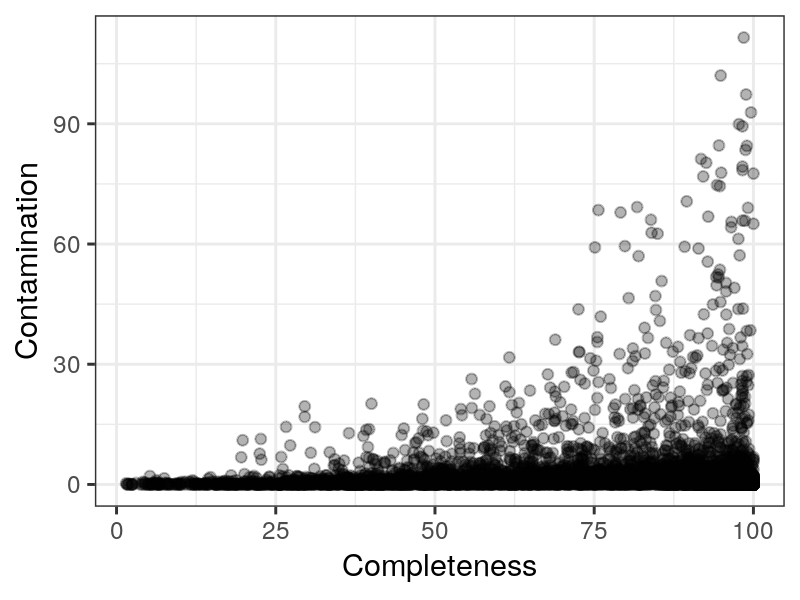

In [77]:
p = mag_data %>%
    ggplot(aes(Completeness, Contamination)) +
    geom_point(alpha=0.3) +
    theme_bw()

p.dims(4,3)
plot(p)

# Just quality MAGs

In [78]:
mag_data_f = mag_data %>%
    filter(Completeness >= 50, Contamination < 5)
mag_data_f

Bin.Id,Domain,Phylum,Class,Order,Family,Genus,Species,fastani_reference,Completeness,Contamination,Genome.size..bp.,X..contigs,N50..contigs.,GC,dataset
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>
SAMEA3663136__maxbin2_low_prob.001.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella sp002251295,GCF_002251295.1,69.20,1.20,2021688,756,2758,46.3,multi-study
SAMEA3663136__maxbin2_low_prob.008.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Muribaculaceae,g__C941,s__,N/A,80.57,0.89,2026627,639,3451,48.2,multi-study
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X44_Meadow_Viper__maxbin2_low_prob.001.contigs,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__Pseudomonas aeruginosa,GCF_001457615.1,97.30,2.42,6229759,364,28867,66.3,multi-species
X95_Meadow_Viper__metabat2_low_PE.002.contigs,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Citrobacter,s__Citrobacter freundii,GCF_000759735.1,89.06,0.94,3738913,673,6514,52.4,multi-species


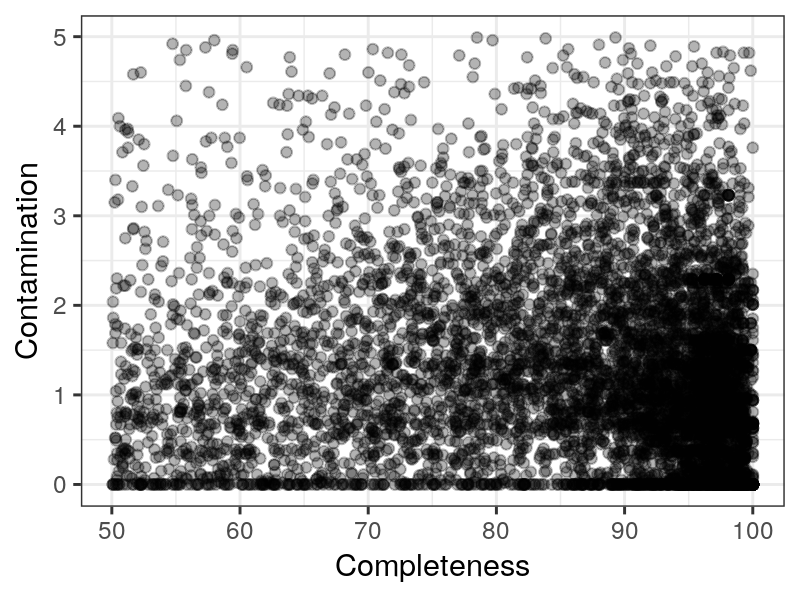

In [79]:
p = mag_data_f %>%
    ggplot(aes(Completeness, Contamination)) +
    geom_point(alpha=0.3) +
    theme_bw()

p.dims(4,3)
plot(p)

## Writing table

In [83]:
summary_file = file.path(work_dir, 'MAGs_all-quality_summary.tsv')
mag_data_f %>%
    rename('num_contigs' = X..contigs,
           'N50_contigs' = N50..contigs.,
           'Genome_size__bp' = Genome.size..bp.) %>%
    arrange(Domain, Phylum, Class, Order, Family, Genus, Species) %>%
    write_table(summary_file)  

File written: /ebio/abt3_projects/Georg_animal_feces/data//metagenome/multi-study/BioProjects/summary/LLMGA/wGeorgAnimal/MAGs_all-quality_summary.tsv 


# sessionInfo

In [84]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Anxiety_Twins_Metagenomes/envs/tidyverse/lib/libopenblasp-r0.3.8.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.4 data.table_1.12.8 ggplot2_3.2.1     tidyr_1.0.2      
[5] dplyr_0.8.5      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3       pillar_1.4.3     compiler_3.6.2   base64enc_0.1-3 
 [5] tools_3.6.2      digest_0.6.25    uuid_0.1-4       json